# Name: Kushal Budhathoki
# Student ID: 2501392
# For classification

importing all the necessary library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# reading the file
df= pd.read_csv("/content/drive/MyDrive/updated_pollution_dataset.csv");

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The main aim of this report is to develop a machine learning model which can perfetcly work on my dataset updated_pollution_dataset.csv. it can be capable of classifying the air quality in four categories good, moderate, poor and hazardous. This classification task supports the UN Sustainable Development goal 3 by finding the early identification of harmful air conditions.

 The dataset is accessed from online Kaggle. The dataset is the Update Pollutuon Dataset which contains 5001 rows which are collected from air quality monitoring sources. It includes environmental attributes such as PM2.5, PM10, NO2, SO2, CO, Temperature, humidity, proximity to industrial areas and population density.
This data is related to the United Nations Sustainable Development Goal (UNSDG) 3: Good Health and Well-Being because air pollution is directly associated with the health risks of people. The project helps to learn about the environmental hazards and make health-related decisions because it predicts the air-quality categories.



 Exploratory Data Analysis (EDA):

In [7]:
# printing first 10 row
print("first 10 row are")
df.head(10)

first 10 row are


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,NaN,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [8]:
# checking no of row and columns
row,column= df.shape
print("row:",row)
print("Column:",column)

row: 5000
Column: 10


In [9]:
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4997 non-null   float64
 1   Humidity                       4996 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           4997 non-null   float64
 4   NO2                            4995 non-null   float64
 5   SO2                            4998 non-null   float64
 6   CO                             4997 non-null   float64
 7   Proximity_to_Industrial_Areas  4996 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,4997.000000,4996.000000,5000.000000,4997.000000,4995.000000,4998.000000,4997.000000,4996.000000,5000.000000
mean,30.032299,70.052102,20.142140,30.209065,26.409209,10.014726,1.500046,8.422878,497.423800
std,6.720747,15.863600,24.554546,27.343621,8.897144,6.751551,0.545939,3.608273,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.775000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [54]:
# checking the columns
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [55]:
# check the value count of Air Quality
df['Air Quality'].value_counts()

,count
Air Quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


In [12]:
# checking the value counts
print(df.isnull().sum())

Temperature                      3
Humidity                         4
PM2.5                            0
PM10                             3
NO2                              5
SO2                              2
CO                               3
Proximity_to_Industrial_Areas    4
Population_Density               0
Air Quality                      0
dtype: int64


here we have found the missing values. temperature contains 3 missing values. humidity contains 4, PM10 contains 3 NO2 contains 5 SO2 contains 2, CO contains 3 proximity to indrustrail areas contains 4. do to handle this we have to fill it

In [13]:
# handling those missing values
# Fill missing values in numeric columns with their mean
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Verify again
print(df.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


/tmp/ipython-input-3668285004.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [14]:
#dropping the duplicates
df.drop_duplicates()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.800000,59.1,5.2,17.9,18.9,9.2,1.720000,6.3,319,Moderate
1,28.300000,75.6,2.3,12.2,30.8,9.7,1.640000,6.0,611,Moderate
2,30.032299,74.7,26.7,33.8,24.4,12.6,1.630000,5.2,619,Moderate
3,27.100000,39.1,6.1,6.3,13.5,5.3,1.150000,11.1,551,Good
4,26.500000,70.7,6.9,16.0,21.9,5.6,1.010000,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.600000,74.1,116.0,126.7,45.5,25.7,2.110000,2.8,765,Hazardous
4996,28.100000,96.9,6.9,25.0,25.3,10.8,1.500046,5.7,709,Moderate
4997,25.900000,78.2,14.2,22.1,34.8,7.8,1.630000,9.6,379,Moderate
4998,25.300000,44.4,21.4,29.0,23.7,5.7,0.890000,11.6,241,Good


In [15]:
#displaying summary after filling values
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.032299,70.052102,20.142140,30.209065,26.409209,10.014726,1.500046,8.422878,497.423800
std,6.718730,15.857252,24.554546,27.335415,8.892693,6.750200,0.545775,3.606829,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


/tmp/ipython-input-3687144976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Air Quality", data=df, palette="Blues")


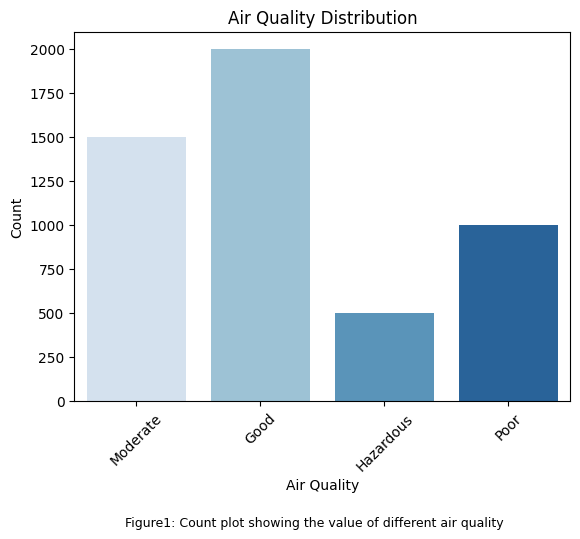

In [16]:
# plotting the value count of air quality
sns.countplot(x="Air Quality", data=df, palette="Blues")
plt.title("Air Quality Distribution")
plt.xlabel("Air Quality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.figtext(
    0.5, -0.15,
    "Figure1: Count plot showing the value of different air quality",
    ha="center",
    fontsize=9
)
plt.show()

from above figure we have plot the air quality in x axis and value counts at y axis. <br>
here 1500 are moderate, 2000 are good, 1000 are poor where as 250 are hazardous.


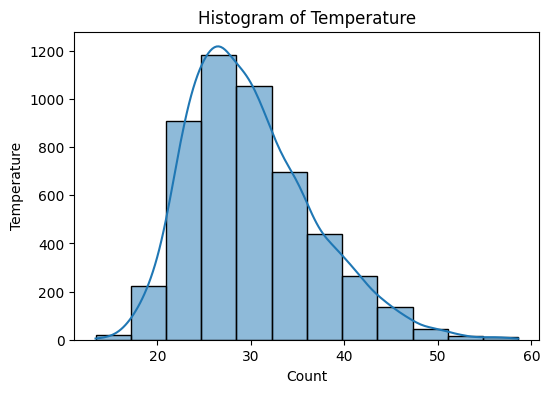

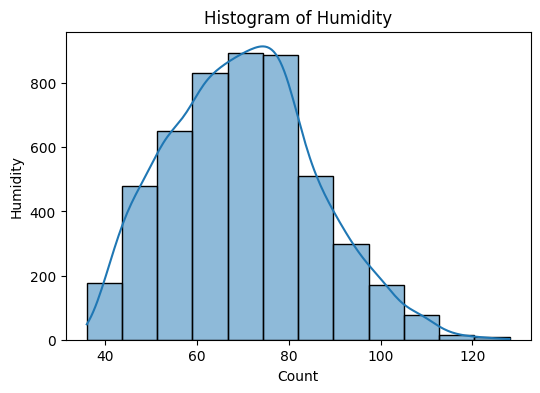

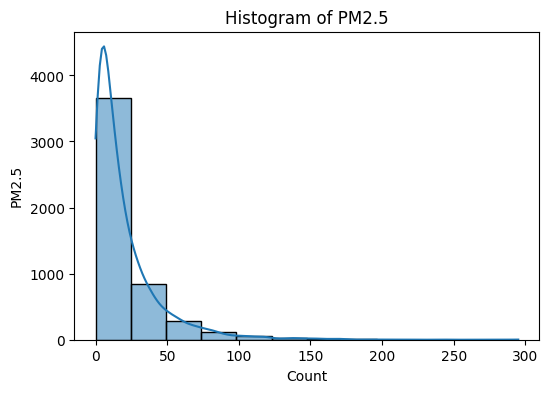

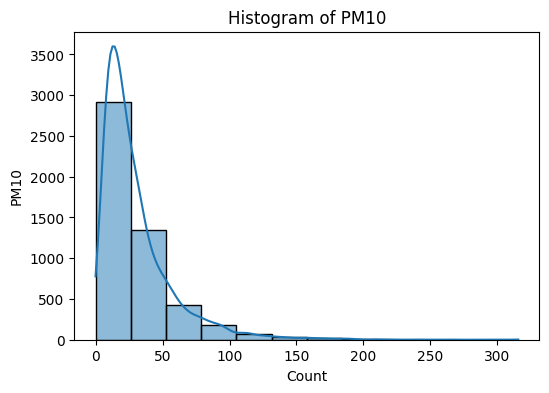

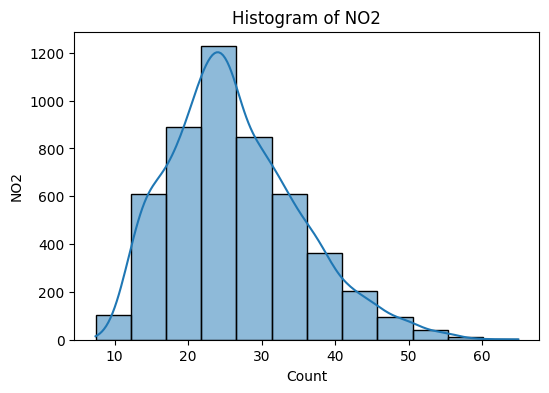

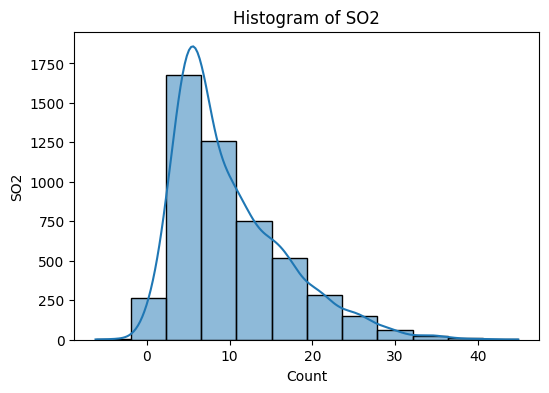

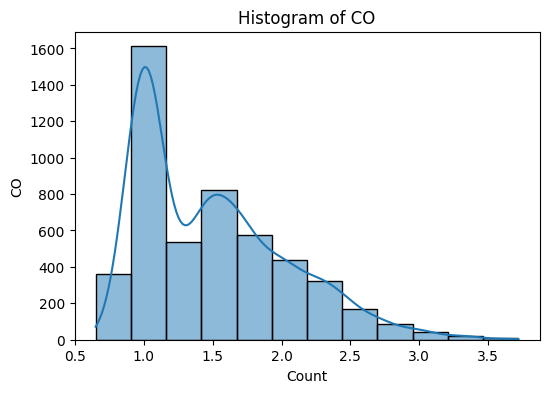

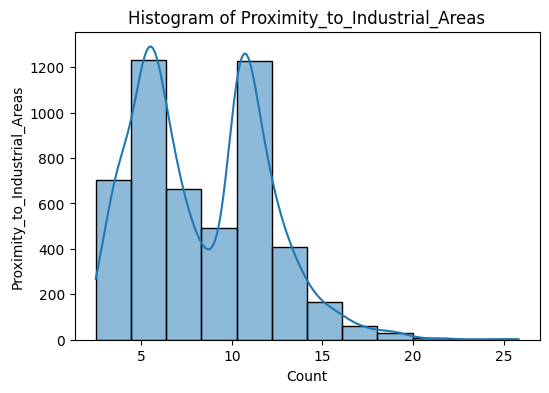

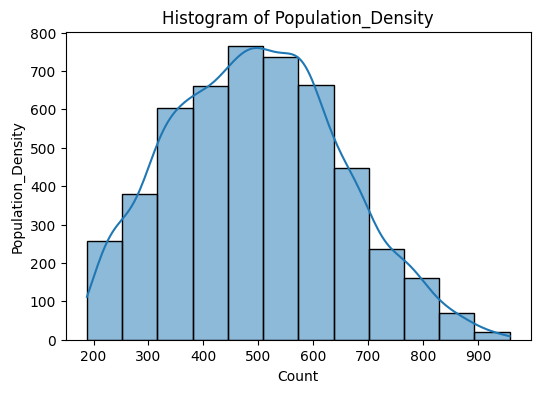

Text(0.5, -0.15, 'Figure2: Histograms')

<Figure size 640x480 with 0 Axes>

In [17]:

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot histograms in a simple loop for each columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
# kde= true gives a smooth line and bins=12 means range of value divided into 12 equal parts
    sns.histplot(df[col], kde=True, bins=12, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

plt.figtext(
    0.5, -0.15,
    "Figure2: Histograms",
    ha="center",
    fontsize=9
)

from above histogram is plotted. from above figure it clears the shape of data and identify the outliers. it display the data are symmetric, skew symmetric

In [18]:
#detecing outliers
# Simple outlier detection using IQR
outlier_counts = {}
cols= df.select_dtypes(include=['number']).columns

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many values are outside the bounds
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_counts[col] = len(outliers)

print("Outlier counts per column:\n", outlier_counts)

Outlier counts per column:
 {'Temperature': 72, 'Humidity': 19, 'PM2.5': 352, 'PM10': 323, 'NO2': 73, 'SO2': 124, 'CO': 45, 'Proximity_to_Industrial_Areas': 15, 'Population_Density': 7}


- Temperature: 72 outliers → 72 readings are unusually high or low compared to the rest.
- Humidity: 19 outliers → fewer extreme values, but still present.
- PM2.5: 352 outliers → very large number of extreme pollution readings.
- PM10: 323 outliers → similar, lots of extreme values.
- NO2: 73 outliers → moderate number of unusual readings.
- SO2: 124 outliers → significant number of extremes.
- CO: 45 outliers → some unusual values.
- Proximity_to_Industrial_Areas: 15 outliers → a few unusual entries.
- Population_Density: 7 outliers → very few unusual entries.


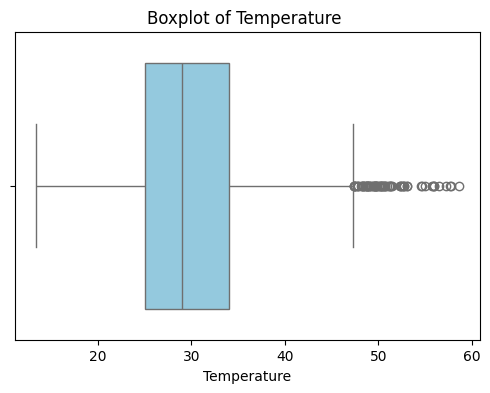

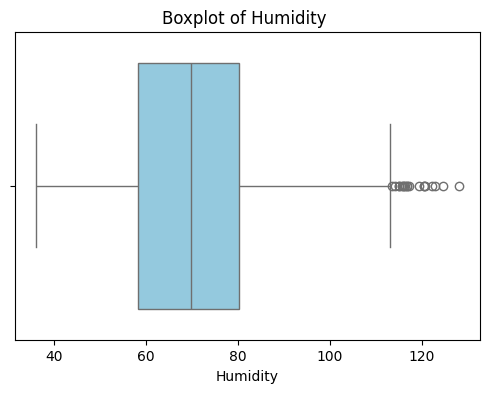

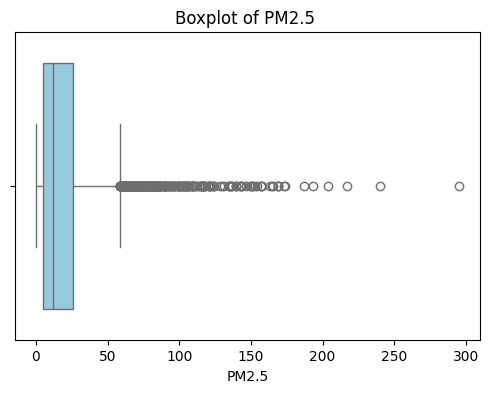

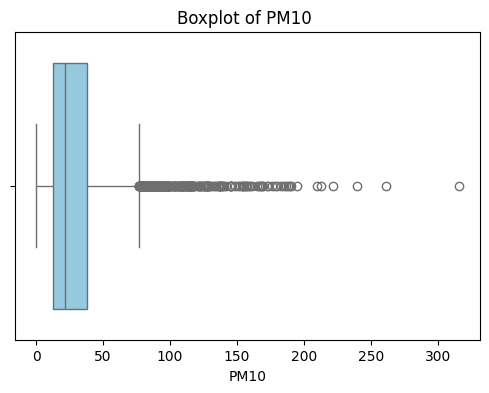

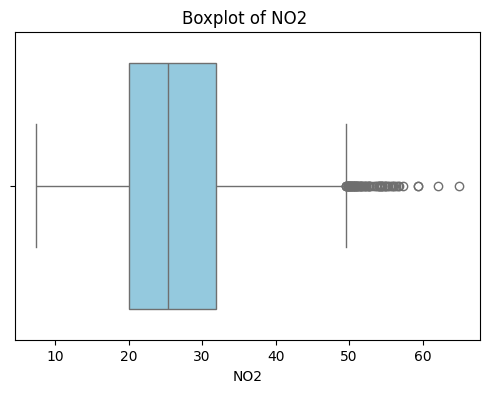

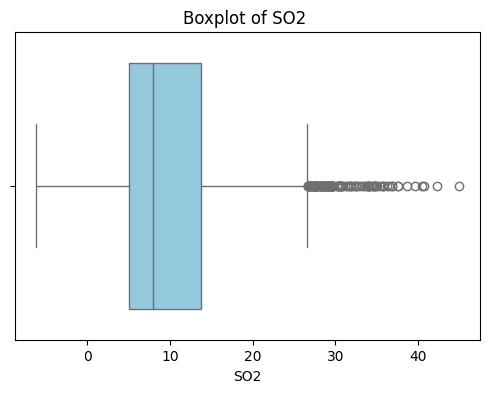

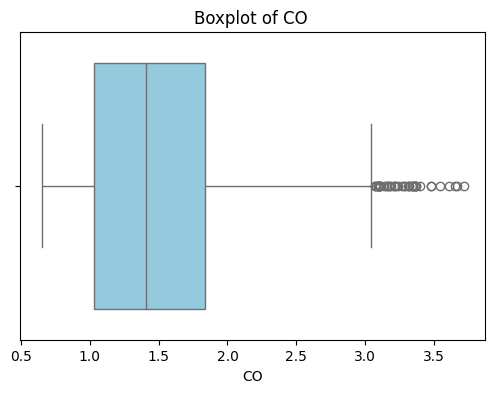

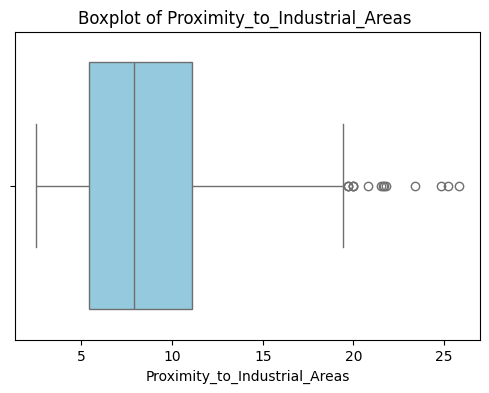

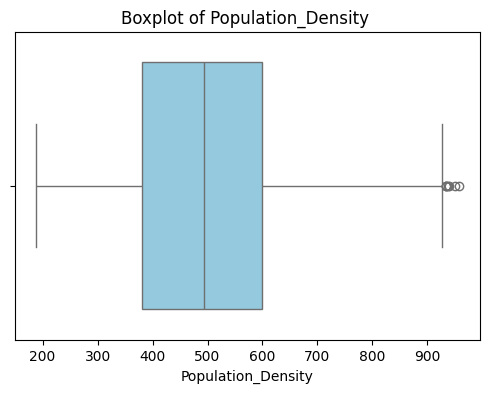

In [59]:
cols = df.select_dtypes(include=['number']).columns

for col in cols:
    plt.figure(figsize=(6,4))

    sns.boxplot(x=df[col], color="skyblue")

    plt.title(f"Boxplot of {col} ")
    plt.xlabel(col)
    plt.show()


box plot showing the outliers for each input features


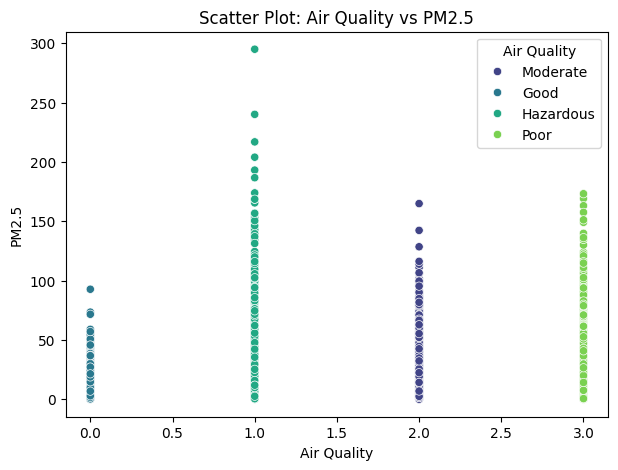

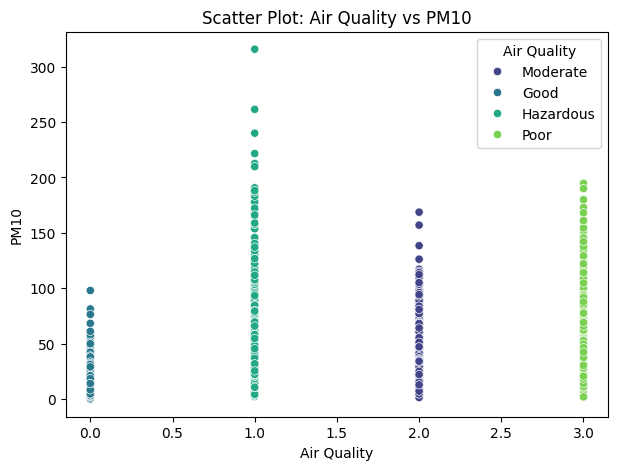

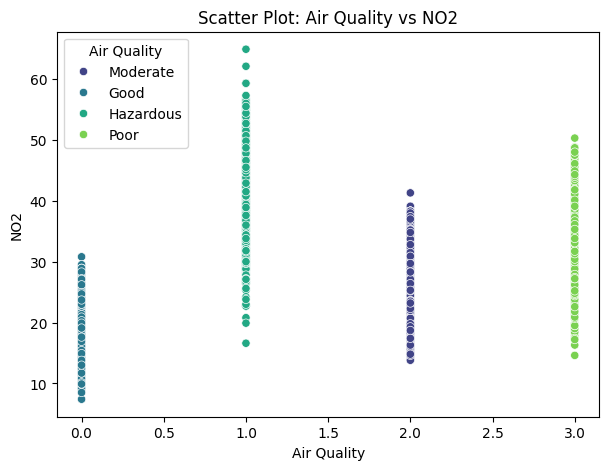

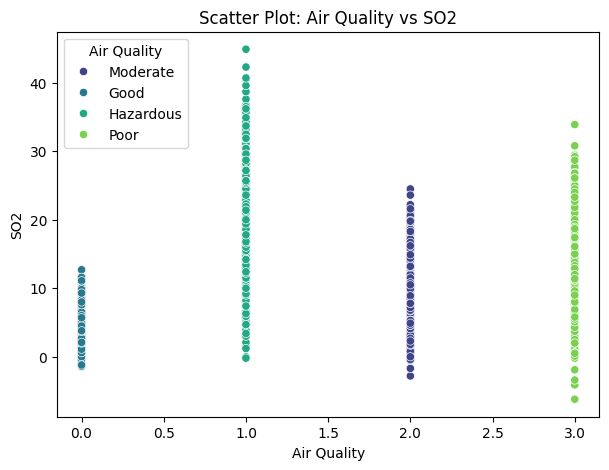

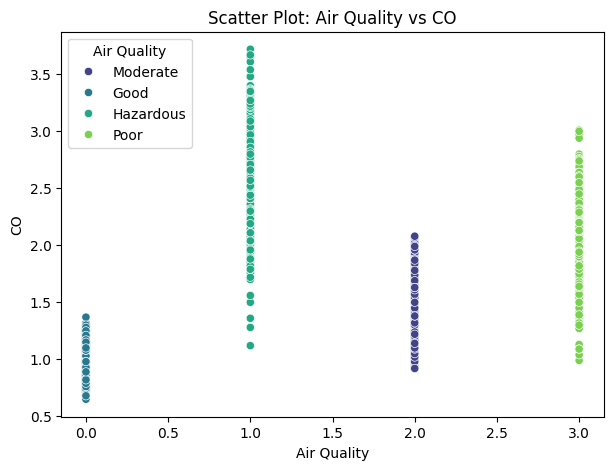

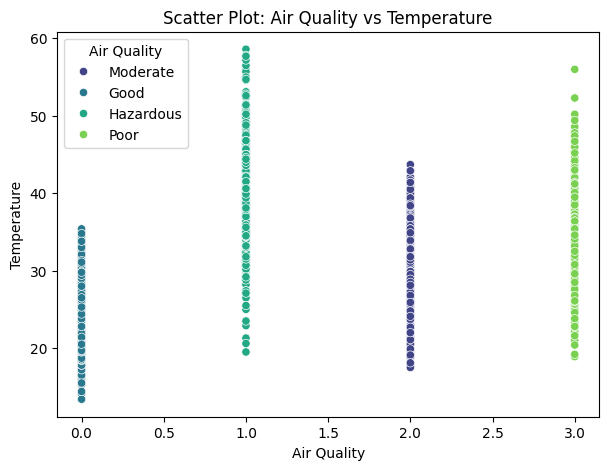

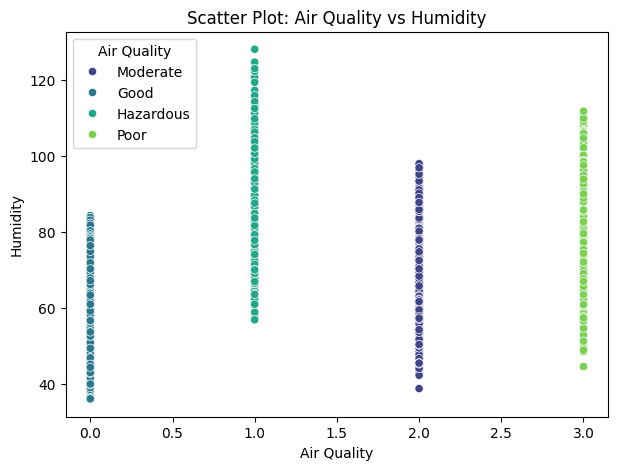

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.800000,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.300000,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,30.032299,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.100000,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.500000,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [19]:

from sklearn.preprocessing import LabelEncoder

# label encoder converts the categorical value or text value into number

le = LabelEncoder()
df['AirQuality_encoded'] = le.fit_transform(df['Air Quality'])

numeric_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Temperature', 'Humidity']

for col in numeric_cols:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='AirQuality_encoded', y=col, data=df, hue='Air Quality', palette='viridis')
    plt.title(f"Scatter Plot: Air Quality vs {col}")
    plt.xlabel("Air Quality")
    plt.ylabel(col)
    plt.show()


drop_column = df.drop(['AirQuality_encoded'], axis=1, inplace=True)

df.head()

# Build a Primary Model  (Two Classical ML Models): <br>
i will use Logistic regression and random forest classifier

# Model 1: Logistic Regression

In [20]:
X= df.drop('Air Quality',axis=1).values
Y= df['Air Quality'].values

In [21]:
# trainning the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape: ",X_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_train shape: ',Y_train.shape)
print("Y_test shape:",Y_test.shape)

X_train shape:  (4000, 9)
X_test shape:  (1000, 9)
Y_train shape:  (4000,)
Y_test shape: (1000,)


In [22]:
# scaling
scalar= StandardScaler()
X_train_scalar= scalar.fit_transform(X_train)
X_test_scalar= scalar.transform(X_test)

# here we perform scaling for classification
#scaling makes all the features in similar range. for example temp= 10-20, humidity= 15-30, pm2.5= 15-3000. the model will think the pm2.5 is most necessary feature becuase it has greater value
#if we do scaling nofeatures will dominates the model

#fit_transform() learn the data or parameters and apply it
#transform() only apply the data

In [23]:
# performing label encoding
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
Y_train_encoder= le.fit_transform(Y_train)
Y_test_encoder= le.transform(Y_test)

our model cannot learn the text value so, out target variable is also text. so we need to convert the text value into numerical value

In [24]:
from sklearn.linear_model import LogisticRegression
logistic_model= LogisticRegression(max_iter=5000,random_state=42)
# train the model
logistic_model.fit(X_train_scalar,Y_train)

# making predictions train and test
y_train_pred=logistic_model.predict(X_train_scalar)
y_test_pred=logistic_model.predict(X_test_scalar)
# print(y_train_pred)
# print("*"*50)
# print(y_test_pred)
# #

#y_train_pred = ...	Predict labels for training data to check learning
#y_test_pred = ...	Predict labels for unseen test data to check generalization

In [25]:
# performing evaluation
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,recall_score,f1_score
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, ConfusionMatrixDisplay,
                           roc_curve, auc,precision_score)


In [67]:
print("Evaluating Logistic regression for trainning : ")
print("performance before hyperparameter tuning and feautre selection")
print("="*50)
print("Accuracy", accuracy_score(Y_train, y_train_pred))
print("Precision:", precision_score(Y_train, y_train_pred, average='macro'))
print("Recall:", recall_score(Y_train, y_train_pred, average='macro'))
print("F1 Score:", f1_score(Y_train, y_train_pred, average='macro'))
#average= macro means treat all the class equallyy

Evaluating Logistic regression for trainning : 
performance before hyperparameter tuning and feautre selection
Accuracy 0.94275
Precision: 0.9232592056505718
Recall: 0.9124419172010696
F1 Score: 0.9175395227539767


In [68]:
print("Evaluating Logistic regression for testing: ")
print("performance before hyperparameter tuning and feautre selection")
print("="*50)
print("Accuracy", accuracy_score(Y_test, y_test_pred))
print("Precision:", precision_score(Y_test, y_test_pred, average='macro'))
print("Recall:", recall_score(Y_test, y_test_pred, average='macro'))
print("F1 Score:", f1_score(Y_test, y_test_pred, average='macro'))
#average= macro means treat all the class equallyy

Evaluating Logistic regression for testing: 
performance before hyperparameter tuning and feautre selection
Accuracy 0.946
Precision: 0.9271573289430433
Recall: 0.9151809808491836
F1 Score: 0.9203094033779986


here, at initially we have accuracy= 0.946, precision 0.942, recall 0.915 and f1 score 0.92

In [27]:
# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_test_pred))




Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.92      0.82      0.87       111
    Moderate       0.95      0.96      0.96       294
        Poor       0.84      0.88      0.86       186

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



In [28]:
#average='macro' calculates the metric for each class separately and then takes the average, treating all classes equally.
conf_matrix = confusion_matrix(Y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[409   0   0   0]
 [  0  91   0  20]
 [  0   0 282  12]
 [  0   8  14 164]]


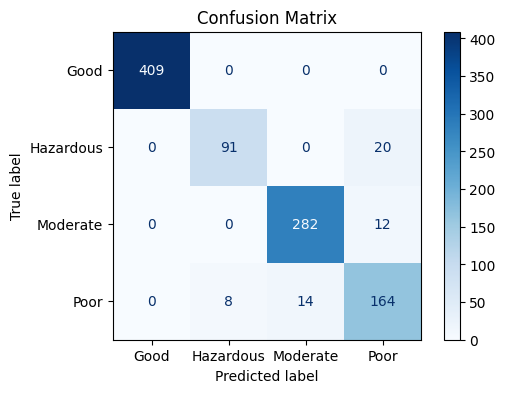

In [69]:

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))

# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=np.unique(Y_test))
disp.plot(cmap='Blues', ax=ax1)
ax1.set_title("Confusion Matrix")

plt.show()

The confusion matrix demonstrates the success of the neural network to classify the four categories of air-quality. The model has gotten an ideal accuracy in the good class, with all samples being accurate (409). In the case of moderate, the results were also excellent, 285 correct forecasts and 9 that were wrongly classified as poor. The hits of the category of Poor were the most correct with 166 hits, but 13 hits were wrongly classified as Moderate, and 7 hits were wrongly classified as Hazardous. The highest coincidence was found between Hazardous and Poor whereby 87 samples were actually true Hazardous but 24 were falsely classified as poor. All in all, the diagonal dominance of the matrix demonstrates that the neural network had worked outstanding with minor confusion among categories that are inherently alike in the level of pollutants. This establishes the strength of the model and its capability to differentiate most of the air-quality conditions.

# Tunning hyperparameters for Model 1:

In [70]:
from sklearn.model_selection import GridSearchCV
parameters_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 15, 1000, 10000],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

#grid search means train the model in a each combination and find the best result from combinatio
# c is regularization strength. smaller c= strong regularization
#penalty means which regularizaitionn we use we have used l2 means sum of squared weights
#solver means the algorithm Logistic Regression uses to optimize the model and find the best weights.

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc_ovr'
}



grid_Search= GridSearchCV(
      estimator=LogisticRegression(max_iter=1000),
    param_grid= parameters_grid,
    # cv= 5 means train on 4 and test on 1
    cv=5,
    scoring=scoring,
    # Use all CPU cores to run Grid Search faster
    n_jobs=-1,
      refit='f1',   # select best model based on F1
    # Shows progress of Grid Search during execution
    verbose=1
)
# train the grid
grid_Search.fit(X_train_scalar, Y_train)

# return the model with best hyperparameter
#best_estimator_ gives the best model
best_model = grid_Search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scalar)
#we use x test scalalr because model was train on scaled feature

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [31]:
# perfirming the calculation

print("\nTuned Logistic Regression")
#best_params_ gives the best tuned parameter

print("Best Parameters:", grid_Search.best_params_)
print("Accuracy:", accuracy_score(Y_test, y_pred_tuned))
print("Precision:", precision_score(Y_test, y_pred_tuned, average='macro'))
print("Recall:", recall_score(Y_test, y_pred_tuned, average='macro'))
print("F1 Score:", f1_score(Y_test, y_pred_tuned, average='macro'))




Tuned Logistic Regression
Best Parameters: {'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.941
Precision: 0.9189459167559519
Recall: 0.9094480425125587
F1 Score: 0.9135997324460721


after tunning the hyperparameter we came to know that we have best c value is 5 solver is lbfgs.. comparing to previous result we can see that it has decrease the accuracy precision but the f1 score is stable which means model is good and can predict the unseen data correctly. f1 score is harmonic means ofrecall and precision

In [32]:
print("Best Parameters:", grid_Search.best_params_)
print("Best F1 Score:", grid_Search.best_score_)

Best Parameters: {'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.9160607316977118


Feature Selection using wrapper methods by using RFE

In [71]:
from sklearn.feature_selection import RFE
# re trainning the logistic model with optimized c value
# log_reg_best = LogisticRegression(
#     C=best_model.C,
#     penalty='l2',
#     solver=best_model.solver,
#     max_iter=5000,
#     random_state=42
# )

rfe = RFE(estimator=best_model, n_features_to_select=5)

# Fit on training data
X_train_selected = rfe.fit_transform(X_train_scalar, Y_train)


X_test_selected = rfe.transform(X_test_scalar)

print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)


Selected Features: [False False  True  True  True False  True  True False]
Feature Ranking: [3 5 1 1 1 2 1 1 4]


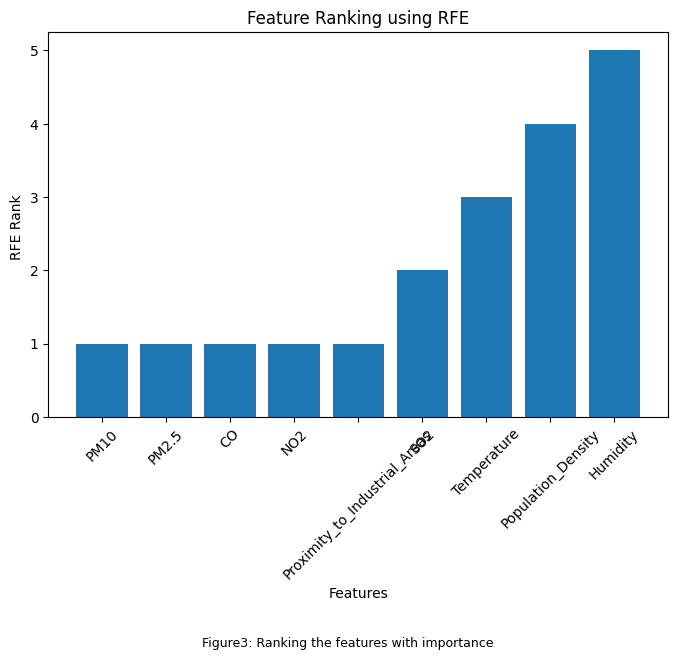

In [72]:
#plotting the ranking of the features
feature_names = df.drop('Air Quality', axis=1).columns
ranks = rfe.ranking_

feature_ranks = pd.DataFrame({
    'Feature': feature_names,
    'Rank': ranks
})

# Sort by importance
feature_ranks = feature_ranks.sort_values(by='Rank')
plt.figure(figsize=(8, 5))
plt.bar(feature_ranks['Feature'], feature_ranks['Rank'])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("RFE Rank ")
plt.title("Feature Ranking using RFE")
plt.figtext(
    0.5, -0.35,
    "Figure3: Ranking the features with importance",
    ha="center",
    fontsize=9
)
plt.show()

from above figure it is clear that PM10 is ranked as most important where are pm2.5, so2 no2 co etc are ranked in order wise.

# Finally rebuilding the model


Final Logistic Regression Model (Hyperparameter + Feature Selection)
Accuracy after feature selection and hyper parameter tuning : 0.922
Precision: 0.8948971654512932
Recall: 0.8797673212228213
F1 Score: 0.8861072626376925

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.88      0.76      0.81       111
    Moderate       0.93      0.94      0.93       294
        Poor       0.78      0.82      0.80       186

    accuracy                           0.92      1000
   macro avg       0.89      0.88      0.89      1000
weighted avg       0.92      0.92      0.92      1000

Confusion Matrix:
[[408   0   1   0]
 [  0  84   0  27]
 [  1   0 277  16]
 [  0  12  21 153]]


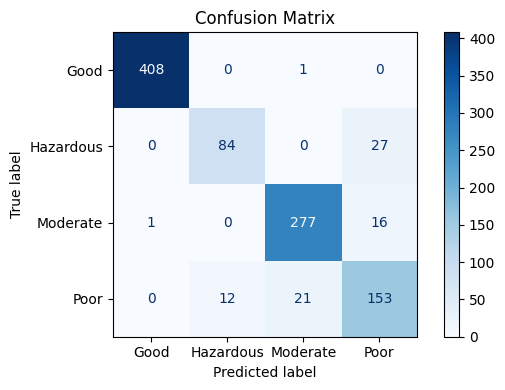

In [73]:
final_model= LogisticRegression(
    C=best_model.C,
    penalty='l2',
    solver=best_model.solver,
    max_iter=5000,
    random_state=42

)
final_model.fit(X_train_selected,Y_train)
y_pred_final= final_model.predict(X_test_selected)

print("Final Logistic Regression Model (Hyperparameter + Feature Selection)")

print("Accuracy after feature selection and hyper parameter tuning :", accuracy_score(Y_test, y_pred_final))
print("Precision:", precision_score(Y_test, y_pred_final, average='macro'))
print("Recall:", recall_score(Y_test, y_pred_final, average='macro'))
print("F1 Score:", f1_score(Y_test, y_pred_final, average='macro'))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_final))


# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, y_pred_final)
print(cm)

# Plot confusion matrix
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))

# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap='Blues', ax=ax1)
ax1.set_title("Confusion Matrix")

plt.tight_layout()
plt.show()


Logistic Regression Macro ROC–AUC: 0.9805145446238134


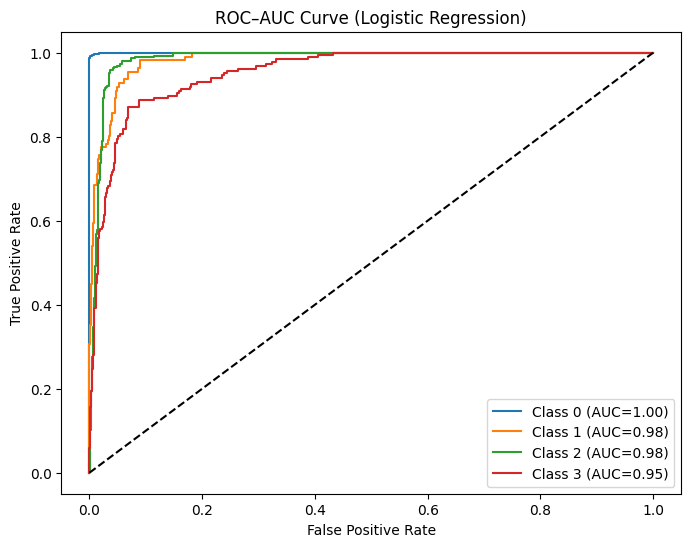

['Good' 'Hazardous' 'Moderate' 'Poor']


In [74]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize


# Train Logistic Regression with selected features
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_selected, Y_train_encoder)   # use encoded labels

#  Get probability scores on TEST set
y_score_log = log_reg.predict_proba(X_test_selected)

# Convert test labels into one-hot format
classes = [0, 1, 2, 3]   # dataset has 4 classes
Y_test_bin = label_binarize(Y_test_encoder, classes=classes)

#  Plot ROC curve for each class
plt.figure(figsize=(8,6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score_log[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC={roc_auc:.2f})')

#  Macro-average ROC–AUC
roc_auc_log_macro = roc_auc_score(Y_test_bin, y_score_log, average="macro", multi_class="ovr")
print("Logistic Regression Macro ROC–AUC:", roc_auc_log_macro)

#  Final plot
plt.plot([0,1],[0,1],'k--')   # baseline diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve (Logistic Regression)")
plt.legend(loc="lower right")
plt.show()
print(le.classes_)


- The AUC values (0.95–1.00) show that the model is not only accurate but also robust in handling false positives and false negatives.
- The slight dip for Class 3 (AUC = 0.95) suggests this category is a bit harder to separate, but still well above acceptable thresholds.

- True Positive Rate (TPR) → how many actual positives are correctly identified.
- False Positive Rate (FPR) → how many actual negatives are incorrectly classified as positives



# Model 2
 selecting Random Forest


# what is random forest. why we need  it and what it solves

first decison tree means one only tree, it has to depend on the probability of only one tree. if tree goes deep it can capture noise instead of learnng new pattern. small change in dataset and change completely different decision.


to over came it random forest came as solver. it is a  combination of decison tree. it builds tree in parallel combine their prediction. it prevents overfitiing


In [37]:
# importing for random forest
from sklearn.ensemble import RandomForestClassifier
randomForestmodel= RandomForestClassifier(random_state=42)
randomForestmodel.fit(X_train_scalar,Y_train)

y_train_pred_randomForest= randomForestmodel.predict(X_train_scalar)
y_test_pred_randomForest= randomForestmodel.predict(X_test_scalar)

In [38]:
print("Evaluating Random forest ")
print("Accuracy before hyperparameter tuning and feautre selection")
print("="*50)
print("Accuracy", accuracy_score(Y_test, y_test_pred_randomForest))
print("Precision:", precision_score(Y_test, y_test_pred_randomForest, average='macro'))
print("Recall:", recall_score(Y_test, y_test_pred_randomForest, average='macro'))
print("F1 Score:", f1_score(Y_test, y_test_pred_randomForest, average='macro'))

Evaluating Random forest 
Accuracy before hyperparameter tuning and feautre selection
Accuracy 0.96
Precision: 0.9437101307794591
Recall: 0.9388741111091341
F1 Score: 0.9411461908030199


# Hyperparameter tuning for random forest using grid search

In [39]:
randomForest_prameters = {
    # n estimators means number of decision tree
    'n_estimators': [100, 200],

    #Maximum number of splits from root to leaf. how long does tree can grow
    #here none means keeps splitting until perfect fit
    'max_depth': [5, 10],


    # Minimum samples required to split an internal node
    'min_samples_split': [2, 5],
}

#model posible= 2*2*2= 8
#if we do cv=5 then 8*5= 40 models

In [40]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc_ovr'   # one-vs-rest ROC-AUC for multi-class
}



rf_grid= GridSearchCV(
    estimator= randomForestmodel,
    param_grid=randomForest_prameters,
    cv=5,
    scoring=scoring,
    refit='f1',
    n_jobs= -1,
    verbose=1
)

#traiining the model

rf_grid.fit(X_train_scalar,Y_train)


print("Best parameters",rf_grid.best_params_)
print("Best CV score:",rf_grid.best_score_)

# random forest with best parameters
best_rf = rf_grid.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_scalar)

print("Test Accuracy after tuning:", accuracy_score(Y_test, y_pred_rf_tuned))
print("Precision:", precision_score(Y_test, y_pred_rf_tuned, average='macro'))
print("Recall:", recall_score(Y_test, y_pred_rf_tuned, average='macro'))
print("F1 Score:", f1_score(Y_test, y_pred_rf_tuned, average='macro'))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.931539571410255
Test Accuracy after tuning: 0.957
Precision: 0.9400650776632452
Recall: 0.9330255205831243
F1 Score: 0.9362666488228855


as we can see after tunning hyperparameter it has slightly decrease on accuracy, precision recall and also f1 score. it has decrease a tiny number only which can be neglated.  we can say model didnt loose much predictive power and we can conclude that our Random Forest model is stable, performs well, and can predict unseen data reliably.

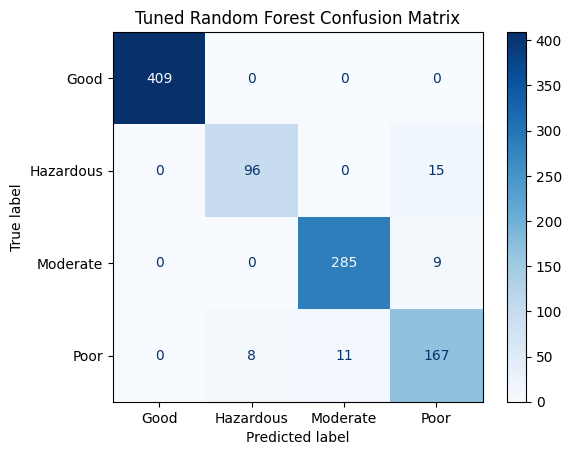

In [41]:
#building confusion matrix
cm_rf = confusion_matrix(Y_test, y_pred_rf_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(Y_test))
disp.plot(cmap='Blues')
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()




# Features Selection using wrapper method (RFE)

In [42]:
from sklearn.feature_selection import RFE

# Step 1: Define RFE with tuned Random Forest
rfe_rf = RFE(estimator=best_rf, n_features_to_select=5)

# Step 2: Transform both train and test sets
X_train_selected_rf = rfe_rf.fit_transform(X_train_scalar,Y_train)
X_test_selected_rf = rfe_rf.transform(X_test_scalar)

print("Selected Features :", rfe_rf.support_)
print("Feature Ranking :", rfe_rf.ranking_)


Selected Features : [ True False False False  True  True  True  True False]
Feature Ranking : [1 3 5 4 1 1 1 1 2]


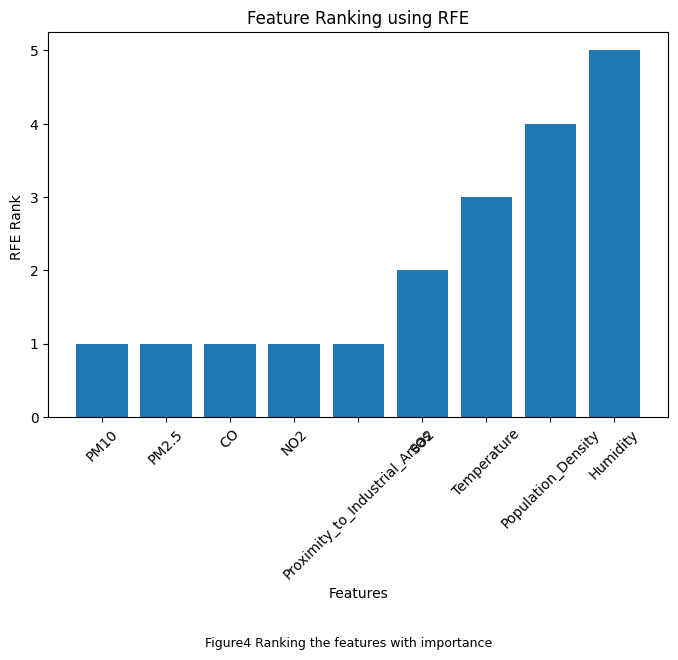

In [43]:
#plotting the ranking of the features
feature_names = df.drop('Air Quality', axis=1).columns
ranks = rfe.ranking_

feature_ranks = pd.DataFrame({
    'Feature': feature_names,
    'Rank': ranks
})

# Sort by importance
feature_ranks = feature_ranks.sort_values(by='Rank')
plt.figure(figsize=(8, 5))
plt.bar(feature_ranks['Feature'], feature_ranks['Rank'])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("RFE Rank ")
plt.title("Feature Ranking using RFE")
plt.figtext(
    0.5, -0.35,
    "Figure4 Ranking the features with importance",
    ha="center",
    fontsize=9
)
plt.show()

Finally retrainning the model

In [44]:
rf_final= RandomForestClassifier(
    **rf_grid.best_params_, # use the best hyperparameters found by GridSearchCV

    random_state=42
)
rf_final.fit(X_train_selected_rf, Y_train)
y_pred_rf_rfe= rf_final.predict(X_test_selected_rf)

# now evaluating the final result

print("Random Forest after RFE Feature Selection:")
print("Accuracy:", accuracy_score(Y_test, y_pred_rf_rfe))
print("Precision:", precision_score(Y_test, y_pred_rf_rfe, average='macro'))
print("Recall:", recall_score(Y_test, y_pred_rf_rfe, average='macro'))
print("F1 Score:", f1_score(Y_test, y_pred_rf_rfe, average='macro'))



Random Forest after RFE Feature Selection:
Accuracy: 0.944
Precision: 0.916503244567011
Recall: 0.9166192196146113
F1 Score: 0.9165565350314044


Random Forest Macro ROC–AUC: 0.991694749898762


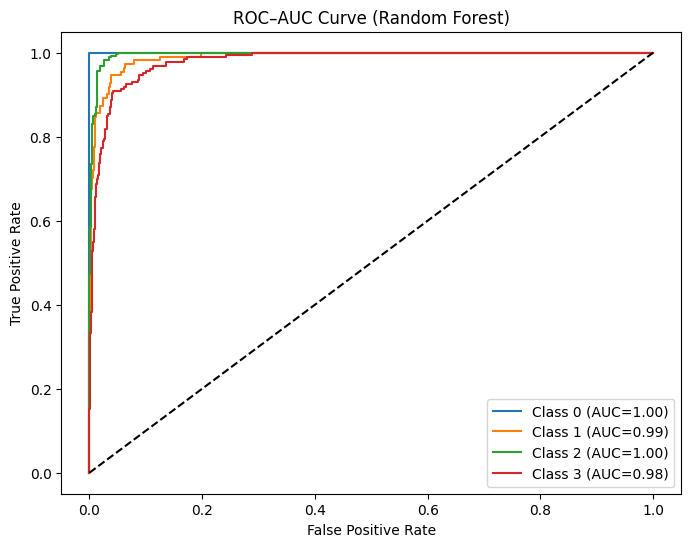

['Good' 'Hazardous' 'Moderate' 'Poor']


In [45]:
# Step 1: Get probability scores from Random Forest
y_score_rd_rocauc = rf_final.predict_proba(X_test_selected_rf)

# Convert test labels into one-hot format
#- Class 0 → Good
#- Class 1 → Moderate
#- Class 2 → Poor
#- Class 3 → Hazardous

classes = [0, 1, 2, 3]   # dataset has 4 classes
Y_test_bin = label_binarize(Y_test_encoder, classes=classes)

#Plot ROC curve for each class
plt.figure(figsize=(8,6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score_rd_rocauc[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC={roc_auc:.2f})')

#Macro-average ROC–AUC
roc_auc_rf = roc_auc_score(Y_test_bin, y_score_rd_rocauc, average="macro", multi_class="ovr")
print("Random Forest Macro ROC–AUC:", roc_auc_rf)

# Step 5: Final plot
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve (Random Forest)")
plt.legend(loc="lower right")
plt.show()
print(le.classes_)

- Class 0 (AUC = 1.00): Perfect separation — the model distinguishes this class flawlessly.
- Class 1 (AUC = 0.99): Almost perfect discrimination.
- Class 2 (AUC = 1.00): Again, perfect separation.
- Class 3 (AUC = 0.98): Slightly lower but still excellent.
The AUC values (0.98–1.00) show that the model is not only accurate but also robust in handling false positives and false negatives.


# Comparing the models

In [46]:
import pandas as pd

comparison_df = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Features Used": sum(rfe.support_),   # logistic RFE
        "Best CV Score": grid_Search.best_score_,  # logistic CV best score
        "Accuracy": accuracy_score(Y_test, y_pred_final),
        "Precision": precision_score(Y_test, y_pred_final, average='macro'),
        "Recall": recall_score(Y_test, y_pred_final, average='macro'),
        "F1 Score": f1_score(Y_test, y_pred_final, average='macro'),
        # "Roc auc":roc_auc_log_macro
    },
    {
        "Model": "Random Forest",
        "Features Used": sum(rfe_rf.support_),   # RF RFE
        "Best CV Score": rf_grid.best_score_,   # RF CV best score
        "Accuracy": accuracy_score(Y_test, y_pred_rf_rfe),
        "Precision": precision_score(Y_test, y_pred_rf_rfe, average='macro'),
        "Recall": recall_score(Y_test, y_pred_rf_rfe, average='macro'),
        "F1 Score": f1_score(Y_test, y_pred_rf_rfe, average='macro'),
          # "Roc auc":roc_auc_rf
    }
])

print("\n Final Model Comparison:\n")
print(comparison_df)


 Final Model Comparison:

                 Model  Features Used  Best CV Score  Accuracy  Precision  \
0  Logistic Regression              5       0.916061     0.922   0.894897   
1        Random Forest              5       0.931540     0.944   0.916503   

     Recall  F1 Score  
0  0.879767  0.886107  
1  0.916619  0.916557  


# Making neural model

In [47]:
# at first label encoding before building the model
#what does label encoding means why we need it and uses of it

#--> label encoding means converting the categorical labels like good moderate poor and hazardous into numeric values like 0 1 2 3
#LabelEncoder converts categorical labels into numbers.

#why we need it
#---> machine learning model can work with numbers only

#uses
#-- trainning stability
#-- avoinding error

In [48]:
# performing label encoding
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
Y_train_encoder= le.fit_transform(Y_train)
Y_test_encoder= le.transform(Y_test)

In [49]:
from sklearn.neural_network import MLPClassifier
mlp_classifier= MLPClassifier(
     hidden_layer_sizes=(100, 50),      # Two hidden layers
    activation='relu',                # ReLU activation
    solver='adam',                    # Adam optimizer
    alpha=0.0001,                     # L2 regularization
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=500,                     # Increased for demonstration
    early_stopping=True,              # Stop when validation score doesn't improve
    validation_fraction=0.1,          # 10% of training for validation
    n_iter_no_change=10,              # Stop after 10 iterations with no improvement
    random_state=42,
    verbose=True                      # Show training progress

)
mlp_classifier.fit(X_train_scalar, Y_train_encoder)


Iteration 1, loss = 1.15534308
Validation score: 0.702500
Iteration 2, loss = 0.77849257
Validation score: 0.820000
Iteration 3, loss = 0.55790866
Validation score: 0.875000
Iteration 4, loss = 0.42245550
Validation score: 0.907500
Iteration 5, loss = 0.33780922
Validation score: 0.897500
Iteration 6, loss = 0.28742074
Validation score: 0.920000
Iteration 7, loss = 0.25527596
Validation score: 0.930000
Iteration 8, loss = 0.23150683
Validation score: 0.935000
Iteration 9, loss = 0.21315704
Validation score: 0.945000
Iteration 10, loss = 0.20054635
Validation score: 0.942500
Iteration 11, loss = 0.19038705
Validation score: 0.942500
Iteration 12, loss = 0.18121071
Validation score: 0.950000
Iteration 13, loss = 0.17709090
Validation score: 0.947500
Iteration 14, loss = 0.17177522
Validation score: 0.950000
Iteration 15, loss = 0.16717035
Validation score: 0.945000
Iteration 16, loss = 0.16124396
Validation score: 0.952500
Iteration 17, loss = 0.15683786
Validation score: 0.955000
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=500,
              random_state=42, verbose=True)

During training, each iteration updates the weights of the neural network to reduce loss. The loss steadily decreased from 1.15 to ~0.11, while the validation score increased from 70% to 96%. This shows the model was learning effectively and early stopping ensured it didn’t overfit. “Loss measures the model’s error on training data, while validation score measures accuracy on unseen validation data. Loss should decrease, and validation score should increase — together they show the model is learning and generalizing.”


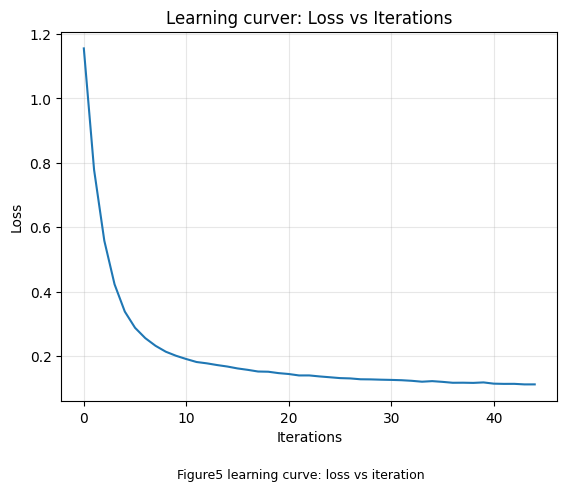

In [50]:


# Plot training loss curve
plt.plot(mlp_classifier.loss_curve_,  label='Training Loss')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Learning curver: Loss vs Iterations")
plt.grid(True, alpha=0.3)
plt.figtext(
    0.5, -0.05,
    "Figure5 learning curve: loss vs iteration",
    ha="center",
    fontsize=9
)
plt.show()

In [51]:
# evaluating model
y_pred_mlp= mlp_classifier.predict(X_test_scalar)

print("for neural network----------------------------->")
print("Accuracy:", accuracy_score(Y_test_encoder, y_pred_mlp))
print("Precision:", precision_score(Y_test_encoder, y_pred_mlp, average='macro'))
print("Recall:", recall_score(Y_test_encoder, y_pred_mlp, average='macro'))
print("F1 Score:", f1_score(Y_test_encoder, y_pred_mlp, average='macro'))

print(f"Number of iterations completed: {mlp_classifier.n_iter_}")

for neural network----------------------------->
Accuracy: 0.947
Precision: 0.929019652022787
Recall: 0.9114111642913486
F1 Score: 0.9184889969950945
Number of iterations completed: 45


Confusion Matrix:
[[409   0   0   0]
 [  0  87   0  24]
 [  0   0 285   9]
 [  0   7  13 166]]


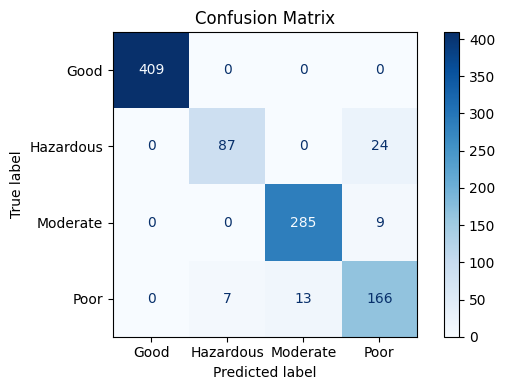

In [52]:
# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test_encoder, y_pred_mlp)
print(cm)

# Plot confusion matrix
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))

# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', ax=ax1)
ax1.set_title("Confusion Matrix")

plt.tight_layout()
plt.show()

Building roc auc curve

 ROC–AUC: 0.9921144033480487


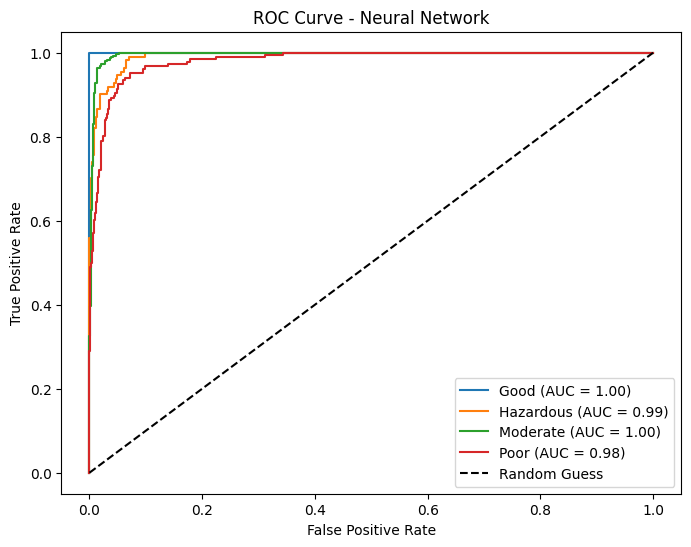

In [78]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

#  Get probabilities
y_score = mlp_classifier.predict_proba(X_test_scalar)

# Convert test labels to one-hot format
Y_test_bin = label_binarize(Y_test_encoder, classes=[0,1,2,3])

# Plot ROC curve for each class
plt.figure(figsize=(8,6))
for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

# Random baseline
roc_auc_nn = roc_auc_score(Y_test_bin, y_score, average="macro", multi_class="ovr")
print(" ROC–AUC:", roc_auc_nn)
plt.plot([0,1], [0,1], 'k--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend(loc="lower right")
plt.show()

“My ROC–AUC curve shows that the neural network distinguishes each air quality category very well. The AUC values (0.98–1.00) mean the model is almost perfect at separating classes. The diagonal line represents random guessing, and since my curves are far above it, the model is highly effective.

1= perferct
0.8-0.99= almost perfect
0.5= random guess

In [80]:
import pandas as pd

comparison_df = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Features Used": sum(rfe.support_),
        "Best CV Score": grid_Search.best_score_,
        "Accuracy": accuracy_score(Y_test, y_pred_final),
        "Precision": precision_score(Y_test, y_pred_final, average='macro'),
        "Recall": recall_score(Y_test, y_pred_final, average='macro'),
        "F1 Score": f1_score(Y_test, y_pred_final, average='macro'),
        "Roc auc": roc_auc_log_macro
    },
    {
        "Model": "Random Forest",
        "Features Used": sum(rfe_rf.support_),
        "Best CV Score": rf_grid.best_score_,
        "Accuracy": accuracy_score(Y_test, y_pred_rf_rfe),
        "Precision": precision_score(Y_test, y_pred_rf_rfe, average='macro'),
        "Recall": recall_score(Y_test, y_pred_rf_rfe, average='macro'),
        "F1 Score": f1_score(Y_test, y_pred_rf_rfe, average='macro'),
        "Roc auc": roc_auc_rf
    },
    {
        "Model": "Neural Network (MLP)",
        "Features Used": X_train_scalar.shape[1],
        "Best CV Score": None,
        "Accuracy": accuracy_score(Y_test_encoder, y_pred_mlp),
        "Precision": precision_score(Y_test_encoder, y_pred_mlp, average='macro'),
        "Recall": recall_score(Y_test_encoder, y_pred_mlp, average='macro'),
        "F1 Score": f1_score(Y_test_encoder, y_pred_mlp, average='macro'),
       "Roc auc": roc_auc_nn
    }
])

print("\n Final Model Comparison:\n")
print(comparison_df)


 Final Model Comparison:

                  Model  Features Used  Best CV Score  Accuracy  Precision  \
0   Logistic Regression              5       0.916061     0.922   0.894897   
1         Random Forest              5       0.931540     0.944   0.916503   
2  Neural Network (MLP)              9            NaN     0.947   0.929020   

     Recall  F1 Score   Roc auc  
0  0.879767  0.886107  0.980515  
1  0.916619  0.916557  0.992114  
2  0.911411  0.918489  0.992114  
